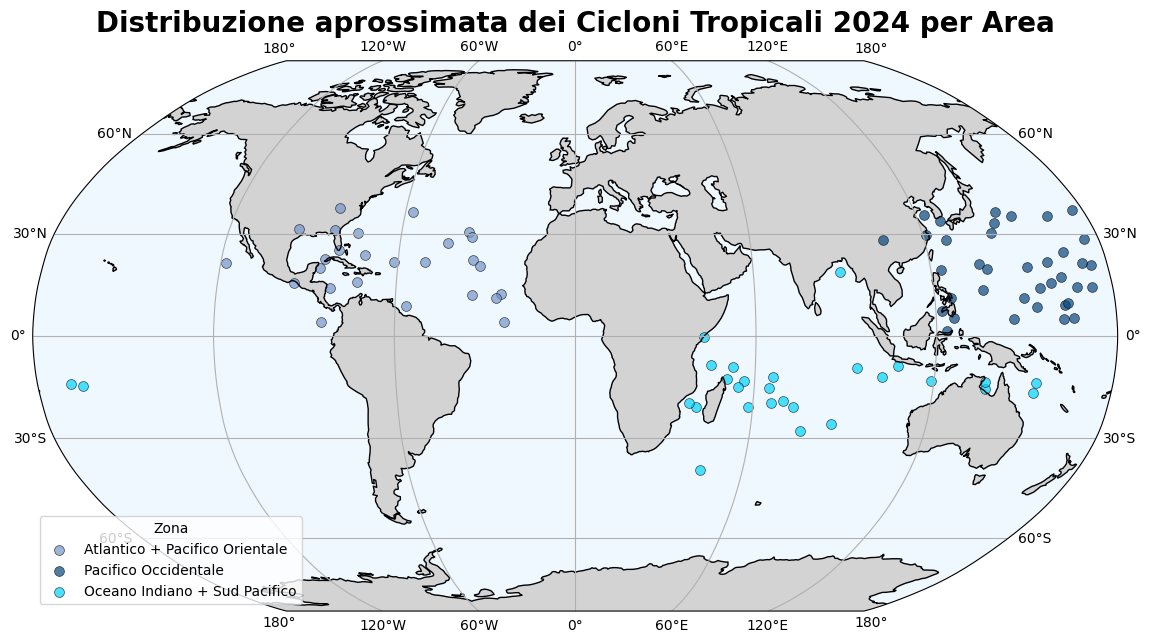

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv('..\\data\\cicloni_2024.csv')

def identifica_zona(lat, lon):
    if lon > 180:
        lon -= 360
    if lat >= 0 and 100 <= lon <= 180:
        return 'Pacifico Occidentale'
    if (-100 <= lon <= -10) or (lat >= 0 and -130 <= lon <= -90):
        return 'Atlantico + Pacifico Orientale'
    if lat <= 0 and 40 <= lon <= 110:
        return 'Oceano Indiano + Sud Pacifico'
    return 'Oceano Indiano + Sud Pacifico'

df['Zona'] = df.apply(lambda row: identifica_zona(row['LAT'], row['LON']), axis=1)

colori = {
    'Atlantico + Pacifico Orientale': "#7395ca",  
    'Pacifico Occidentale': "#09467c",          
    'Oceano Indiano + Sud Pacifico': "#00d5ff"  
}

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


for zona, color in colori.items():
    subset = df[df['Zona'] == zona]
    ax.scatter(subset['LON'], subset['LAT'], color=color, s=50, alpha=0.7,
               label=zona, edgecolors='k', linewidth=0.5, transform=ccrs.PlateCarree())

plt.title("Distribuzione dei Cicloni Tropicali 2024 per Area", fontsize=20, fontweight='bold')
plt.legend(title="Zona", loc='lower left')
plt.show()
